In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [2]:
data = pd.read_csv('WSN-DS.csv')
pd.set_option('display.max_columns', 500)

In [3]:
data.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [4]:
data.shape

(374661, 19)

In [5]:
# Check the distribution of the 'Attack type' categories
category_distribution = data['Attack type'].value_counts()
category_distribution
#sns.barplot(category_distribution,width=0.3)

Attack type
Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: count, dtype: int64

In [6]:
data.dtypes

 id                   int64
 Time                 int64
 Is_CH                int64
 who CH               int64
 Dist_To_CH         float64
 ADV_S                int64
 ADV_R                int64
 JOIN_S               int64
 JOIN_R               int64
 SCH_S                int64
 SCH_R                int64
Rank                  int64
 DATA_S               int64
 DATA_R               int64
 Data_Sent_To_BS      int64
 dist_CH_To_BS      float64
 send_code            int64
Expaned Energy      float64
Attack type          object
dtype: object

In [7]:
while True:
    data.dropna(inplace = True)
    data.drop_duplicates(inplace= True)
    data.isnull().sum
    data.duplicated().sum()
    break

In [8]:
# Number of records to select
total_records = 10000
normal_records_count = total_records // 2  # 50% of total records

# Select 'Normal' records
normal_records = data[data['Attack type'] == 'Normal'].sample(n=normal_records_count, random_state=1)
print(f' total records {total_records} \n number of normal records {normal_records['Attack type'].count()}')

# the number of remaining records to be sampled among other categories
remaining_records_count = total_records - normal_records_count
print(f' remaining records count {remaining_records_count}')

 total records 10000 
 number of normal records 5000
 remaining records count 5000


In [9]:
# Select records from other categories
other_categories = data[data['Attack type'] != 'Normal']
# Group by 'Attack type'
grouped_data = other_categories.groupby('Attack type')

In [10]:
#calculate sample size for each group
def calculate_sample_size(group):
    group_size = len(group)
    total_size = len(other_categories)
    sample_size = int(group_size / total_size * remaining_records_count)
    return sample_size

#Sample records from each group
def sample_group(group):
    sample_size = calculate_sample_size(group)
    return group.sample(n=sample_size, random_state=1)

# Apply the sample_group function to each category group in other_categories
other_records = other_categories.groupby('Attack type').apply(sample_group).reset_index(drop=True)

# Combine 'Normal' and other categories records
new_data = pd.concat([normal_records, other_records])

# Shuffle the sampled data to mix the records
new_data = new_data.sample(frac=1, random_state=1).reset_index(drop=True)

# Display the count of each attack type in the sampled data
new_data['Attack type'].value_counts()
new_data.shape

C:\Users\ME\AppData\Local\Temp\ipykernel_19768\3652345526.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  other_records = other_categories.groupby('Attack type').apply(sample_group).reset_index(drop=True)


(9997, 19)

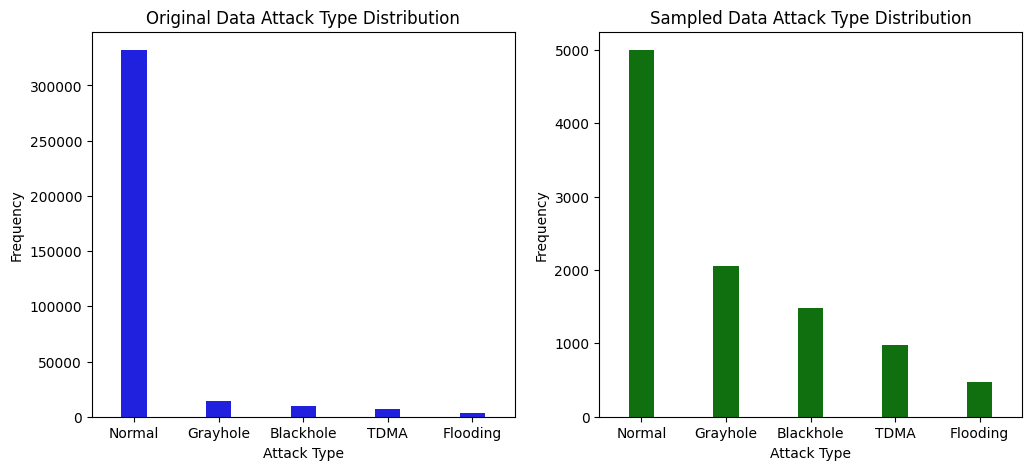

In [11]:
import matplotlib.pyplot as plt

# Plot the distribution of 'Attack type' for the original data
#data['Attack type'].hist()
plt.figure(figsize=(12, 5))

# Plotting Train R^2 Score
plt.subplot(1,2,1)
sns.barplot(data['Attack type'].value_counts(), width=0.3,color='blue')
plt.title('Original Data Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')

# Plot the distribution of 'Attack type' for the sampled data
#new_data['Attack type'].hist()
plt.subplot(1,2,2)
sns.barplot(new_data['Attack type'].value_counts(), width=0.3,color='green')
plt.title('Sampled Data Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.show()

In [12]:
# while True:
#     nul = new_data.isnull().sum()
#     dp = new_data.duplicated().sum()
#     shape = new_data.shape
#     break
# display(nul)
# display(dp)
# display(shape)

In [13]:
# while True:
#     new_data.drop_duplicates(inplace=True)
#     new_data.dropna(inplace=True)
#     break

In [14]:
while True:
    nul = new_data.isnull().sum()
    dp = new_data.duplicated().sum()
    shape = new_data.shape
    break
display(nul)
display(dp)
display(shape)

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

0

(9997, 19)

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Assuming `new_data` is your dataset and contains only numeric features except the target
features = new_data.drop('Attack type', axis=1)  # replace 'Attack type' with your target column name
#display(features)
# Fit the scaler to your data and transform it
normalized_features = scaler.fit_transform(features)

# If you want to convert it back to a DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_df.head()
# Add the 'Attack type' column back
normalized_df['Attack type'] = new_data['Attack type']
normalized_df.head()


,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,0.034242,0.457608,1.0,0.034272,0.000000,0.012658,0.035714,0.0,0.393939,0.010101,0.0,0.000000,0.000000,0.901408,0.070539,0.690216,0.0,0.535712,Grayhole
1,0.005171,0.243506,0.0,0.005173,0.043506,0.000000,0.214286,1.0,0.000000,0.000000,1.0,0.010309,0.178423,0.000000,0.000000,0.000000,0.4,0.017284,Normal
2,0.152441,0.942906,1.0,0.152439,0.000000,0.012658,0.142857,0.0,0.030303,0.030303,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001273,TDMA
3,0.090919,0.272053,1.0,0.090918,0.000000,0.240506,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.053942,0.471267,0.0,0.150645,Flooding
4,0.212120,0.257779,1.0,0.212118,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.053942,0.788932,0.0,0.052723,Flooding


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the categorical target variable 'Attack type'
normalized_df['Attack type'] = label_encoder.fit_transform(normalized_df['Attack type'])
normalized_df.head()
normalized_df.shape


(9997, 19)

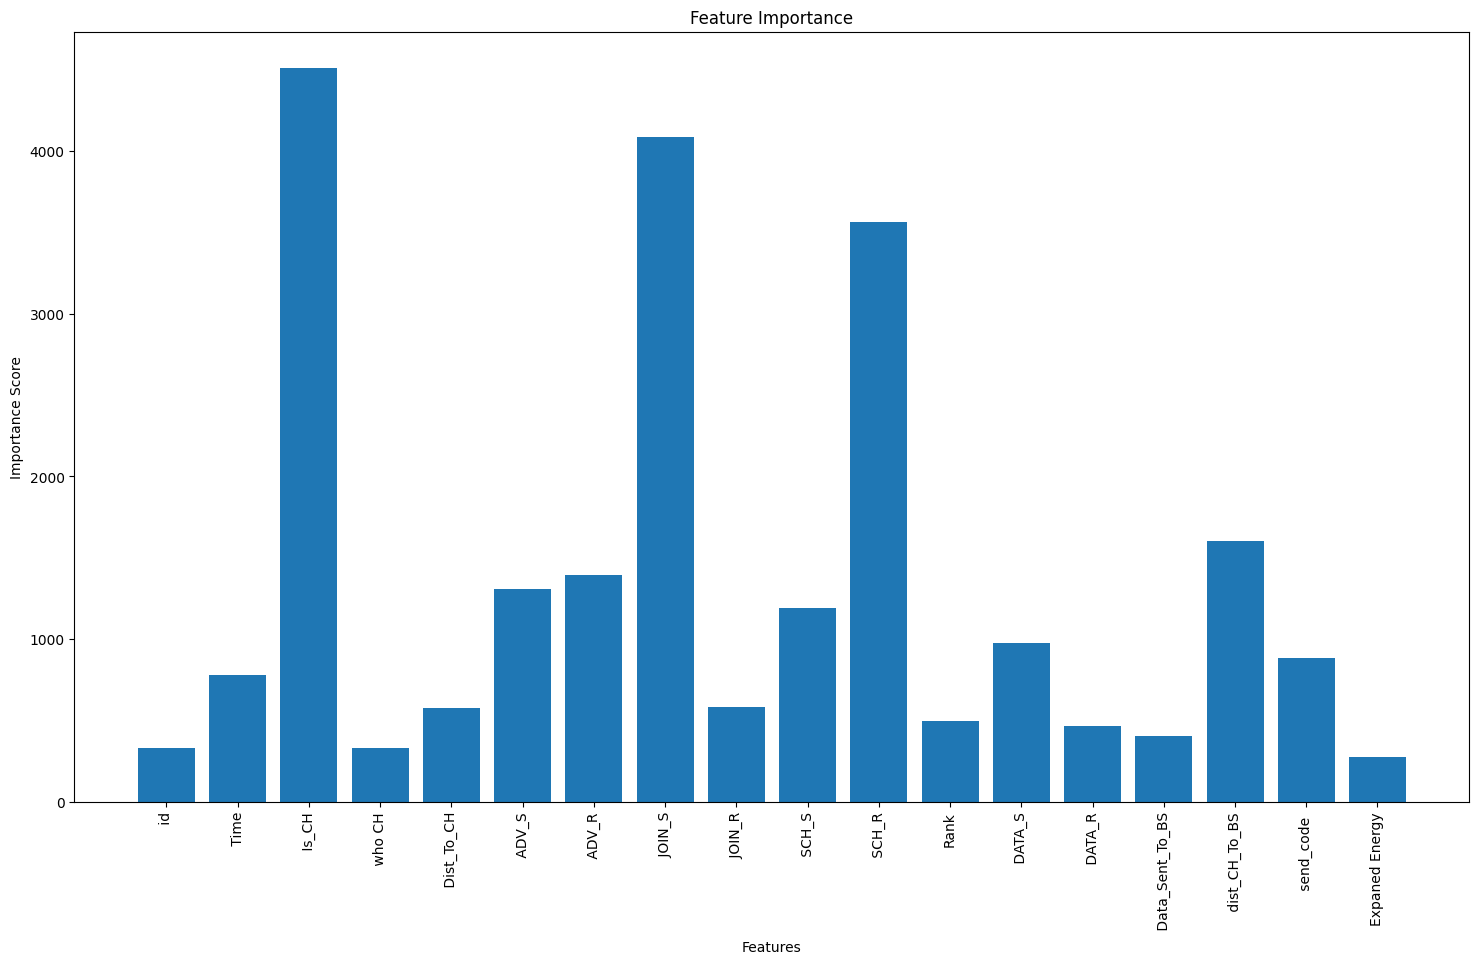

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

# Perform feature selection
selector = SelectKBest(score_func=chi2, k='all')
optimal_features = selector.fit_transform(normalized_df.drop(columns=['Attack type']), normalized_df['Attack type'])

# Get the scores for each feature
feature_scores = selector.scores_
# Plot the scores
plt.figure(figsize =(18,10))
plt.bar(features.columns, feature_scores)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Assuming all other columns excet 'Attack type' are features
label = normalized_df['Attack type']
features = normalized_df.drop(columns='Attack type')
Y = label
X = features
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [19]:
t1 = time.time()
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
t2 = time.time()
KNN_train_time = t2-t1

In [20]:
t3 = time.time()
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
t4 = time.time()
DT_train_time = t4-t3

In [21]:
t5 = time.time()
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=42)
nn.fit(x_train, y_train)
t6 = time.time()
NN_train_time = t6-t5

c:\Users\ME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
t7 = time.time()
from sklearn.svm import SVC
svm = SVC(kernel='linear')  
svm.fit(x_train, y_train)
t8 = time.time()
SVM_train_time = t8-t7

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming models are already trained and named as knn, svm, dt, nn




# K-NN Evaluation
knn_train_pred = knn.predict(x_train)
knn_train_r2 = r2_score(y_train, knn_train_pred)

t1 = time.time()
knn_test_pred = knn.predict(x_test)
t2 = time.time()
KNN_test_time = t2 - t1

knn_test_r2 = r2_score(y_test, knn_test_pred)
knn_mse = mean_squared_error(y_test, knn_test_pred)
knn_mae = mean_absolute_error(y_test, knn_test_pred)

# SVM Evaluation
svm_train_pred = svm.predict(x_train)
svm_train_r2 = r2_score(y_train, svm_train_pred)

t1 = time.time()
svm_test_pred = svm.predict(x_test)
t2 = time.time()
SVM_test_time = t2 - t1

svm_test_r2 = r2_score(y_test, svm_test_pred)
svm_mse = mean_squared_error(y_test, svm_test_pred)
svm_mae = mean_absolute_error(y_test, svm_test_pred)

# Decision Tree Evaluation
dt_train_pred = dt.predict(x_train)
dt_train_r2 = r2_score(y_train, dt_train_pred)

t1 = time.time()
dt_test_pred = dt.predict(x_test)
t2 = time.time()
DT_test_time = t2 - t1

dt_test_r2 = r2_score(y_test, dt_test_pred)
dt_mse = mean_squared_error(y_test, dt_test_pred)
dt_mae = mean_absolute_error(y_test, dt_test_pred)

# Neural Network Evaluation
nn_train_pred = nn.predict(x_train)
nn_train_r2 = r2_score(y_train, nn_train_pred)

t1 = time.time()
nn_test_pred = nn.predict(x_test)
t2 = time.time()
NN_test_time = t2 - t1

nn_test_r2 = r2_score(y_test, nn_test_pred)
nn_mse = mean_squared_error(y_test, nn_test_pred)
nn_mae = mean_absolute_error(y_test, nn_test_pred)



# # Print K-NN evaluation metrics
# print("K-NN Train R^2 score:", knn_train_r2)
# print("K-NN Test R^2 score:", knn_test_r2)
# print("K-NN Mean Squared Error:", knn_mse)
# print("K-NN Mean Absolute Error:", knn_mae)


# # Print SVM evaluation metrics
# print("SVM Train R^2 score:", svm_train_r2)
# print("SVM Test R^2 score:", svm_test_r2)
# print("SVM Mean Squared Error:", svm_mse)
# print("SVM Mean Absolute Error:", svm_mae)


# # Print Decision Tree evaluation metrics
# print("DT Train R^2 score:", dt_train_r2)
# print("DT Test R^2 score:", dt_test_r2)
# print("DT Mean Squared Error:", dt_mse)
# print("DT Mean Absolute Error:", dt_mae)


# # Print Neural Network evaluation metrics
# print("NN Train R^2 score:", nn_train_r2)
# print("NN Test R^2 score:", nn_test_r2)
# print("NN Mean Squared Error:", nn_mse)
# print("NN Mean Absolute Error:", nn_mae)

# import pandas as pd

# # Create a dictionary to summarize the evaluation metrics
# summary = {
#     'Model': ['K-NN', 'SVM', 'Decision Tree', 'Neural Network'],
#     'Train R^2 Score': [knn_train_r2, svm_train_r2, dt_train_r2, nn_train_r2],
#     'Test R^2 Score': [knn_test_r2, svm_test_r2, dt_test_r2, nn_test_r2],
#     'Mean Squared Error': [knn_mse, svm_mse, dt_mse, nn_mse],
#     'Mean Absolute Error': [knn_mae, svm_mae, dt_mae, nn_mae]
# }

# evaluation_summary = pd.DataFrame(summary)

# evaluation_summary


In [24]:
from sklearn.metrics import accuracy_score

# K-NN Evaluation
knn_test_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_test_pred)

# SVM Evaluation
svm_test_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_test_pred)

# Decision Tree Evaluation
dt_test_pred = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_test_pred)

# Neural Network Evaluation
nn_test_pred = nn.predict(x_test)
nn_accuracy = accuracy_score(y_test, nn_test_pred)

# Print evaluation metrics
print("K-NN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Neural Network Accuracy:", nn_accuracy)

# Create a dictionary to summarize the evaluation metrics
summary = {
    'Model': ['K-NN', 'SVM', 'Decision Tree', 'Neural Network'],
    'Accuracy': [knn_accuracy, svm_accuracy, dt_accuracy, nn_accuracy],
    'Training Runtime (seconds)': [KNN_train_time, SVM_train_time, DT_train_time, NN_train_time],
    'Testing Runtime (seconds)': [KNN_test_time, SVM_test_time, DT_test_time, NN_test_time]
}

# Create the DataFrame
evaluation_summary = pd.DataFrame(summary)

# Display the updated summary
display(evaluation_summary)

K-NN Accuracy: 0.9363333333333334
SVM Accuracy: 0.879
Decision Tree Accuracy: 0.9703333333333334
Neural Network Accuracy: 0.918


,Model,Accuracy,Training Runtime (seconds),Testing Runtime (seconds)
0,K-NN,0.936333,0.001995,0.122812
1,SVM,0.879000,0.235333,0.111759
2,Decision Tree,0.970333,0.122719,0.001028
3,Neural Network,0.918000,3.749183,0.001992


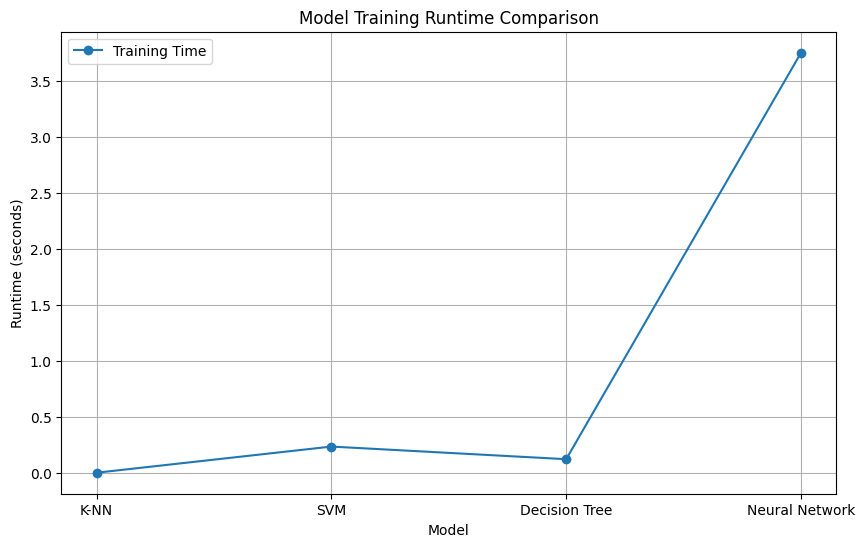

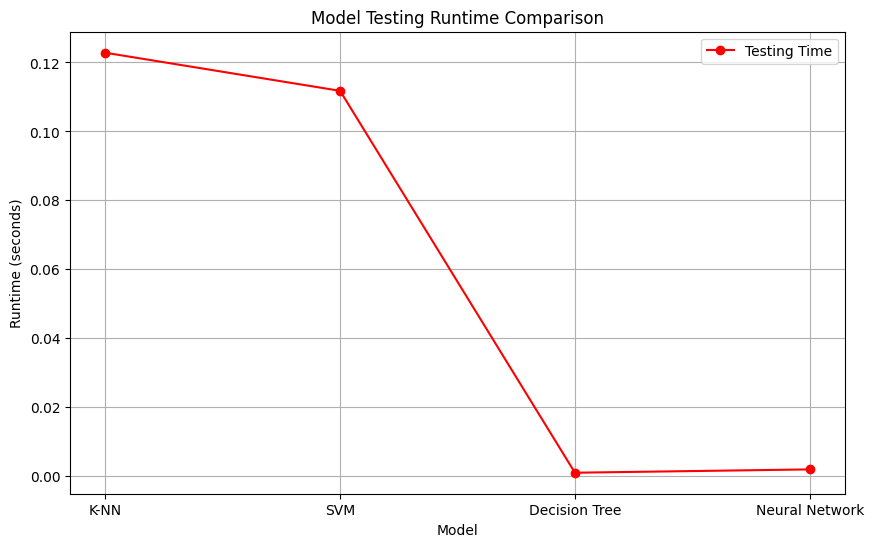

C:\Users\ME\AppData\Local\Temp\ipykernel_19768\1156337653.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=evaluation_summary, palette='coolwarm',width = 0.3)


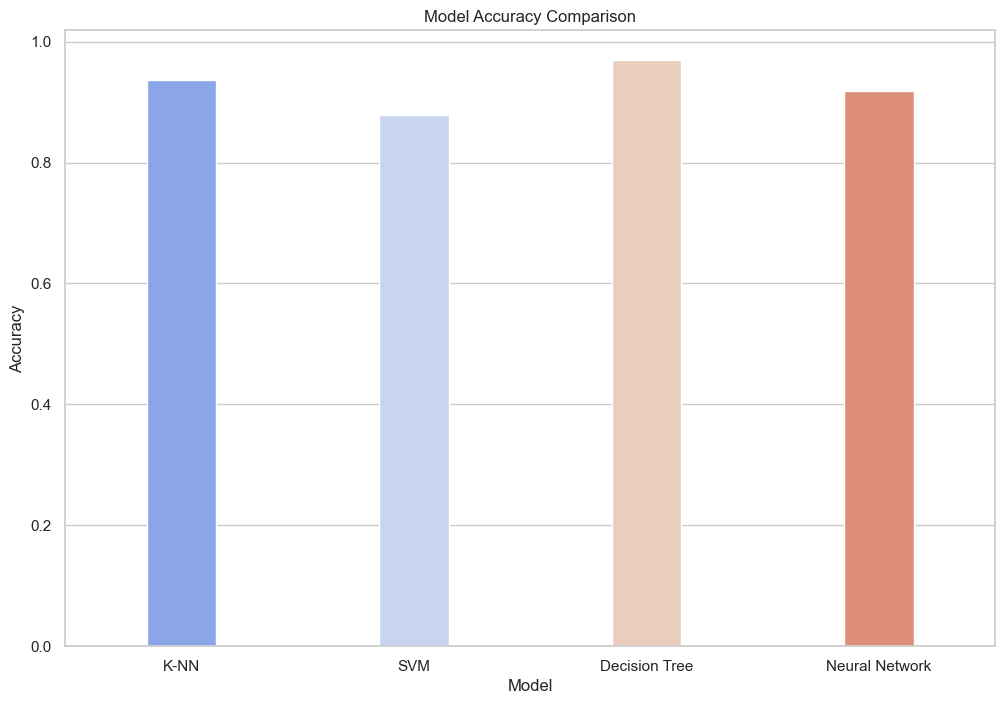

In [25]:
import matplotlib.pyplot as plt

# Set up the plot for training run times
plt.figure(figsize=(10, 6))
plt.plot(evaluation_summary['Model'], evaluation_summary['Training Runtime (seconds)'], marker='o', label='Training Time')
plt.title('Model Training Runtime Comparison')
plt.xlabel('Model')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.legend()
plt.show()

# Set up the plot for testing run times
plt.figure(figsize=(10, 6))
plt.plot(evaluation_summary['Model'], evaluation_summary['Testing Runtime (seconds)'], marker='o', color='r', label='Testing Time')
plt.title('Model Testing Runtime Comparison')
plt.xlabel('Model')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Bar plot for Accuracy
sns.barplot(x='Model', y='Accuracy', data=evaluation_summary, palette='coolwarm',width = 0.3)

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

